## MAGMA experimnetations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from magma import MAGMA

### Common HP + Exponentiated Quadratic Kernel

In [2]:
t0 = 0
tN = 10 + 1e-3
N = 200
M = 5

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(200,)


In [3]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
print(m0.shape)

(200,)


In [4]:
theta0 = ExponentiatedQuadraticKernel.init_parameters()
print(theta0)

[0.63817394 0.24099967]


In [5]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(200, 200)


In [6]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(200,)


In [7]:
Theta = ExponentiatedQuadraticKernel.init_parameters()
Sigma = np.random.uniform(0, 1)

print(Theta)
print(Sigma)

[0.02048692 0.45720121]
0.7022818815003934


In [8]:
Y = np.zeros((M, N))
for i in range(M):
    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta, common_T)
    Psi_Theta_Sigma = C_Theta + Sigma * np.identity(N)
    Yi = np.random.multivariate_normal(mu0, Psi_Theta_Sigma)
    Y[i] = Yi
print(Y.shape)

(5, 200)


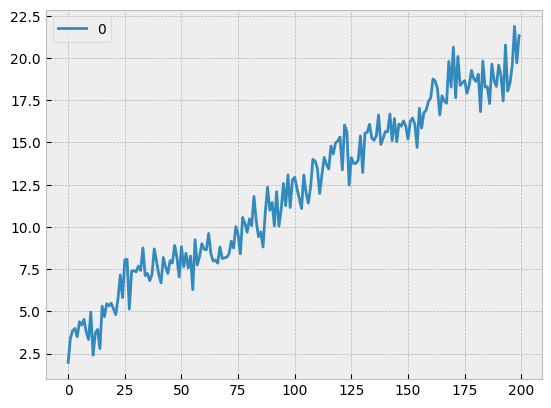

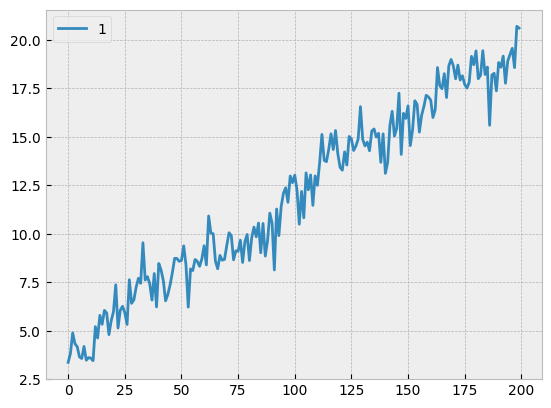

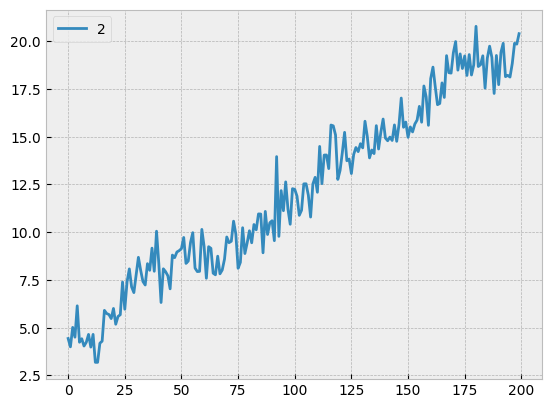

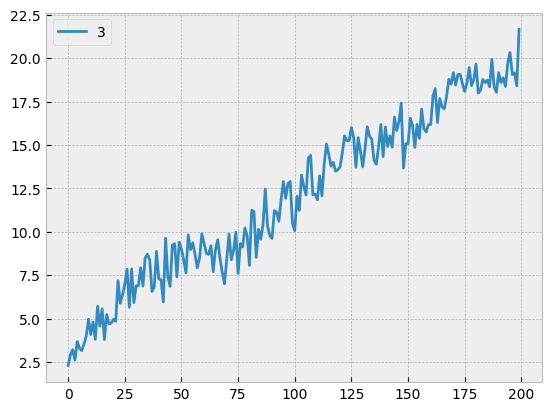

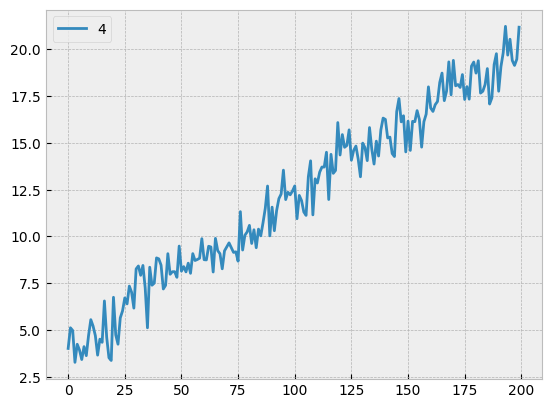

In [12]:
for i in range(M):
    plt.plot(Y[i], label=f"{i}")
    plt.legend()
    plt.show()

In [13]:
model = MAGMA(
    T=None,
    Y=Y,
    common_T=common_T,
    m0=m0, 
    theta0=theta0, 
    Theta=Theta, 
    Sigma=Sigma,
    common_hp_flag=True,
    save_history_flag=False,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [16]:
for attr in model.__dict__.items():
    print(attr)

('common_T', array([ 0.        ,  0.05025628,  0.10051256,  0.15076884,  0.20102513,
        0.25128141,  0.30153769,  0.35179397,  0.40205025,  0.45230653,
        0.50256281,  0.5528191 ,  0.60307538,  0.65333166,  0.70358794,
        0.75384422,  0.8041005 ,  0.85435678,  0.90461307,  0.95486935,
        1.00512563,  1.05538191,  1.10563819,  1.15589447,  1.20615075,
        1.25640704,  1.30666332,  1.3569196 ,  1.40717588,  1.45743216,
        1.50768844,  1.55794472,  1.60820101,  1.65845729,  1.70871357,
        1.75896985,  1.80922613,  1.85948241,  1.90973869,  1.95999497,
        2.01025126,  2.06050754,  2.11076382,  2.1610201 ,  2.21127638,
        2.26153266,  2.31178894,  2.36204523,  2.41230151,  2.46255779,
        2.51281407,  2.56307035,  2.61332663,  2.66358291,  2.7138392 ,
        2.76409548,  2.81435176,  2.86460804,  2.91486432,  2.9651206 ,
        3.01537688,  3.06563317,  3.11588945,  3.16614573,  3.21640201,
        3.26665829,  3.31691457,  3.36717085,  3.41

In [17]:
model.fit()

theta0


AssertionError: 